In [1]:
# testing BayLIME on images
# based on https://github.com/x-y-zhao/BayLime/blob/master/BayLIME_tutorial_images.ipynb
# Tatsuo Okubo
# 2021/11/06

In [4]:
# When you're running this for the first time in a new machine, follow the instructions below:
# Copy-paste the modified_sklearn_BayesianRidge.py file (in the lime/utils folder on this repo) into your local sklearn.linear_model folder. 
# To find out where the folder is, simply run:

from sklearn import linear_model
print(linear_model.__file__)

/home/tatsuo/miniconda3/envs/citrus/lib/python3.7/site-packages/sklearn/linear_model/__init__.py


In [5]:
from BayLime.lime import lime_image

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte
import tensorflow as tf
from tensorflow import keras

In [7]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [8]:
tf.__version__

'2.4.1'

In [9]:
keras.__version__

'2.4.0'

In [10]:
inet_model = tf.keras.applications.InceptionV3(weights="imagenet")  # load weights from a model pre-trained on ImageNet

2021-11-11 21:35:19.058632: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-11 21:35:19.058816: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-11 21:35:19.059176: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


96116736/96112376 [==============================] - 13s 0us/step


In [11]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

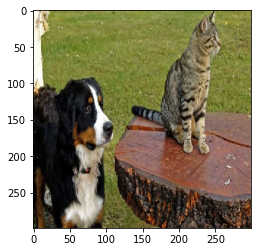

2021-11-11 21:35:41.028208: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-11 21:35:41.049833: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


40960/35363 [==================================] - 0s 1us/step
('n02107683', 'Bernese_mountain_dog', 0.68255985)
('n02107908', 'Appenzeller', 0.037938636)
('n02108000', 'EntleBucher', 0.015411627)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.014435468)
('n02102040', 'English_springer', 0.0015393263)


In [12]:
images = transform_img_fn([os.path.join('BayLime', 'data','dogs.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

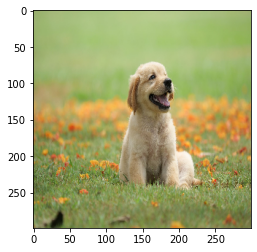

('n02099601', 'golden_retriever', 0.7591786)
('n02099712', 'Labrador_retriever', 0.13248323)
('n02102318', 'cocker_spaniel', 0.015282787)
('n02101556', 'clumber', 0.014689269)
('n02104029', 'kuvasz', 0.0038136798)


In [13]:
images = transform_img_fn([os.path.join('BayLime', 'data','5.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

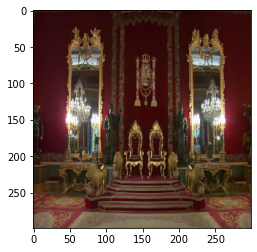

('n04429376', 'throne', 0.9483307)
('n02699494', 'altar', 0.0037875208)
('n03028079', 'church', 0.0036688403)
('n02791124', 'barber_chair', 0.003418646)
('n02791270', 'barbershop', 0.0019843136)


In [14]:
images = transform_img_fn([os.path.join('BayLime', 'data','throne.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

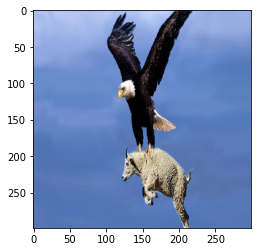

('n01614925', 'bald_eagle', 0.59443015)
('n01608432', 'kite', 0.021287866)
('n02106166', 'Border_collie', 0.0045800237)
('n03937543', 'pill_bottle', 0.0029079686)
('n02105412', 'kelpie', 0.0021812385)


In [15]:
images = transform_img_fn([os.path.join('BayLime', 'data','eagle_sheep.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [16]:
preds[0].shape

(1000,)

In [17]:
# make sure to convert float to double
image_uint = img_as_ubyte(images)
image_uint.dtype

dtype('uint8')

In [18]:
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})

## Original LIME 

/home/tatsuo/Python/interpretable-citrus/BayLime/lime/wrappers/scikit_image.py:118: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the number of features: 122


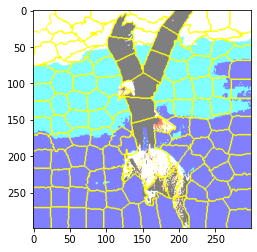

  0%|          | 0/200 [00:00<?, ?it/s]

using non_Bay option for model regressor
using non_Bay option for model regressor
using non_Bay option for model regressor


In [19]:
explainer = lime_image.LimeImageExplainer(feature_selection='none')#kernel_width=0.1
explanation = explainer.explain_instance(image_uint[0], inet_model.predict,
                                         top_labels=3, hide_color=0, batch_size=10,
                                         num_samples=200, model_regressor='non_Bay')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For feature of segment 41
The mean of the (posterior) coefficient 0.5108988434928712
The variance of the (posterior) coefficient 0.0
For feature of segment 28
The mean of the (posterior) coefficient -0.179495606648029
The variance of the (posterior) coefficient 0.0
For feature of segment 114
The mean of the (posterior) coefficient -0.1351010371289578
The variance of the (posterior) coefficient 0.0
For feature of segment 117
The mean of the (posterior) coefficient -0.11085396878290679
The variance of the (posterior) coefficient 0.0
For feature of segment 34
The mean of the (posterior) coefficient 0.11064540137816173
The variance of the (posterior) coefficient 0.0
For feature of segment 75
The mean of the (posterior) coefficient 0.10476027515116457
The variance of the (posterior) coefficient 0.0
For feature of segment 35
The mean of the (posterior) coefficient 0.10220653100895868
The variance of the (posterior) coefficient 0.0
For feature of segment 100
The mean of the (posterior) coeffi

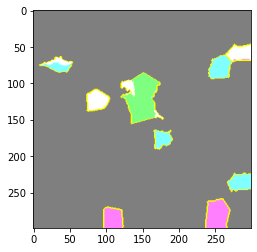

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


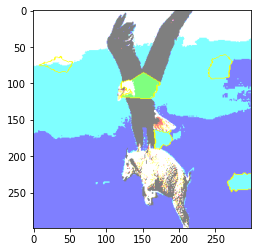

[('41', 0.5108988434928712), ('28', -0.179495606648029), ('114', -0.1351010371289578), ('117', -0.11085396878290679), ('34', 0.11064540137816173), ('75', 0.10476027515116457), ('35', 0.10220653100895868), ('100', 0.10005815156614223), ('50', -0.09318233336542928), ('55', 0.08842100577403811), ('83', 0.0881567829388933), ('60', 0.08679666598356711), ('9', -0.0840613249995815), ('43', -0.0802422010963602), ('94', -0.07867902909593649), ('16', -0.07831408042887537), ('121', 0.07806478043182952), ('56', 0.07804781254127242), ('5', -0.0768987533869752), ('23', 0.07613322160680866), ('57', 0.07447768237857089), ('24', -0.0694435854572898), ('63', 0.06835791903754597), ('80', -0.06809024936309041), ('42', 0.06749586793943015), ('12', 0.06500450512786662), ('104', 0.06450781079742926), ('72', -0.0629222205252048), ('81', -0.06232558784680864), ('27', 0.06177040820449559), ('51', -0.06135172210080953), ('86', -0.060824443874511615), ('89', -0.06048751931581224), ('40', -0.060220284973211156), (

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

print(explanation.as_list(explanation.top_labels[0]))

## BayLIME with non-informative prior

the number of features: 114


/home/tatsuo/Python/interpretable-citrus/BayLime/lime/wrappers/scikit_image.py:118: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


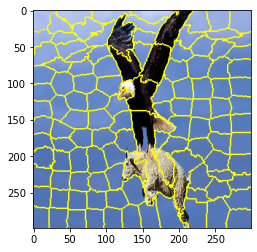

  0%|          | 0/200 [00:00<?, ?it/s]

using Bay_non_info_prior option for model regressor
Convergence after  13  iterations
the alpha is 41.44269456310594
the lambda is 474.4884773052604
the regulation term lambda/alpha is 11.449267049533752


In [21]:
explanation = explainer.explain_instance(images[0], inet_model.predict,
                                         top_labels=1, hide_color=0, batch_size=10,
                                         num_samples=200,model_regressor='Bay_non_info_prior')
#'non_Bay' 'Bay_non_info_prior' 'Bay_info_prior','BayesianRidge_inf_prior_fit_alpha'

For feature of segment 42
The mean of the (posterior) coefficient 0.23422966361086137
The variance of the (posterior) coefficient 0.0008707834909705308
For feature of segment 61
The mean of the (posterior) coefficient 0.11036195839437475
The variance of the (posterior) coefficient 0.0008550626602751534
For feature of segment 25
The mean of the (posterior) coefficient 0.07932178506206043
The variance of the (posterior) coefficient 0.0008500003912315766
For feature of segment 82
The mean of the (posterior) coefficient -0.07076923409720018
The variance of the (posterior) coefficient 0.0009063825723128003
For feature of segment 27
The mean of the (posterior) coefficient 0.06789633586787244
The variance of the (posterior) coefficient 0.0009421980342648844


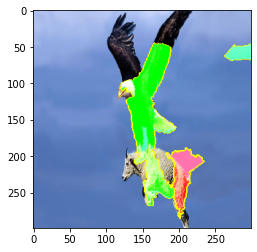

[('42', 0.23422966361086137), ('61', 0.11036195839437475), ('25', 0.07932178506206043), ('82', -0.07076923409720018), ('27', 0.06789633586787244), ('41', 0.06280832221638158), ('75', -0.06265732780691466), ('29', 0.05897249777098197), ('92', -0.05366768263152433), ('6', -0.051715188759862994), ('39', -0.04908864539190899), ('104', 0.04676323138325289), ('10', 0.04612062894192821), ('48', -0.044418976184582626), ('50', 0.0442175020852672), ('21', 0.041509253218100645), ('72', 0.040721210429650906), ('78', -0.03808780350808708), ('40', 0.036636622064613544), ('65', -0.03346221425156761), ('111', -0.0328893962902732), ('4', -0.032772328177984644), ('85', -0.03276782763154902), ('23', -0.03272242590464115), ('45', 0.03247259481784764), ('73', 0.031892142841764365), ('69', 0.031723425430126746), ('36', -0.03162557005228384), ('28', -0.031098602192714226), ('38', -0.030451100781681558), ('43', 0.029595311463289354), ('18', -0.028527938402358496), ('101', 0.027891591639679504), ('2', -0.02771

In [22]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

print(explanation.as_list(explanation.top_labels[0]))